In [7]:
%cd
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("画像処理100/imori.jpg")

%whos

/home/jovyan
Variable   Type       Data/Info
-------------------------------
C          int        3
H          int        128
K          ndarray    3x3: 9 elems, type `float64`, 72 bytes
K_size     int        3
W          int        128
c          int        2
cv2        module     <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
img        ndarray    128x128x3: 49152 elems, type `uint8`, 49152 bytes
img2       ndarray    130x130x3: 50700 elems, type `float64`, 405600 bytes (396.09375 kb)
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pad        int        1
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sigma      float      1.3
tmp        ndarray    130x130x3: 50700 elems, type `float64`, 405600 bytes (396.09375 kb)
x          int        127
y          int        127


In [10]:
H, W, C = img.shape
K_size = 3
sigma = 1.3

pad = K_size // 2
img2 = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
img2[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
        
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

tmp = img2.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            img2[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])
            
img2 = img2[pad:pad+H, pad:pad+W].astype(np.uint8)            

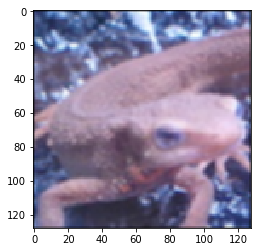

In [11]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))